<a href="https://colab.research.google.com/github/cindysotton/Video-Game-Prediction/blob/main/Analyse_Statistiques_JV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

# import du dataset
df = pd.read_csv('/content/drive/MyDrive/Formation Data Analyst/Fichiers Projet Data/vgsales_all.csv')

# supression des colonnes inutiles
df = df.drop(["Rank"], axis=1)

# Processing des NaN
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
df  = (df[(df['Year'] < 2022) ])
df = df.dropna(subset=['Global_Sales'])
df = df.dropna(subset=['Critic_Score']) #pas dans le script de Dorian 
# analyse des NaN restants
df.isna().sum(axis=0)
# remplacer les NaN par O pour éviter la création d'array lors du pivot
df['NA_Sales'] = df['NA_Sales'].fillna(0)
df['PAL_Sales'] = df['PAL_Sales'].fillna(0)
df['JP_Sales'] = df['JP_Sales'].fillna(0)
df['Other_Sales'] = df['Other_Sales'].fillna(0)

# renommer pour plus de compréhension
df = df.rename(columns={'Developer' : 'Studio'})
df = df.rename(columns={'PAL_Sales' : 'EU_Sales'})
#reformatage pour effacer les espaces
df['Publisher'] = df['Publisher'].str.strip()
df['Studio'] = df['Studio'].str.strip()

#supression des doublons
df = df.drop_duplicates(keep = 'first')

In [ ]:
# après une analyse de la répartition des valeurs, on enlève les variables extreme (minoritaire)
df = df.drop(df[(df['Year'] == '1989')| 
                (df['Year'] == '1987')| 
                (df['Year'] == '1985')| 
                (df['Year'] == '2020')|
                (df['Year'] == '2019')|
                (df['Year'] == '1990')|
                (df['Year'] == '1992')|
                (df['Year'] == '1994')|
                (df['Year'] == '1991')|
                (df['Year'] == '1993')].index)

df = df.drop(df[(df['Genre'] == 'Visual Novel')|
                (df['Genre'] == 'Board Game')| 
                (df['Genre'] == 'Sandbox')|
                (df['Genre'] == 'MMO')| 
                (df['Genre'] == 'Education')].index)

df = df.drop(df[(df['Platform'] == 'GEN')|
                (df['Platform'] == 'VC')|
                (df['Platform'] == 'XBL')|
                (df['Platform'] == 'PSN')|
                (df['Platform'] == 'NES')|
                (df['Platform'] == 'GBC')|
                (df['Platform'] == 'PSV')|
                (df['Platform'] == 'SAT')|
                (df['Platform'] == 'GB')|
                (df['Platform'] == 'SNES')].index)

In [ ]:
df.corr()

,Year,Critic_Score,User_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metascore,userscore
Year,1.000000,-0.009688,-0.052100,-0.044684,0.049075,-0.084808,0.073190,-0.011620,-0.071472,-0.132993
Critic_Score,-0.009688,1.000000,0.509663,0.220938,0.201884,0.170781,0.179368,0.230545,0.943028,0.478212
User_Score,-0.052100,0.509663,1.000000,0.109262,0.082694,0.058374,0.136301,0.104645,0.561225,0.525495
NA_Sales,-0.044684,0.220938,0.109262,1.000000,0.805708,0.546409,0.693434,0.950532,0.232422,0.097770
EU_Sales,0.049075,0.201884,0.082694,0.805708,1.000000,0.520902,0.733342,0.922334,0.204098,0.062757
JP_Sales,-0.084808,0.170781,0.058374,0.546409,0.520902,1.000000,0.353982,0.672902,0.159697,0.148716
Other_Sales,0.073190,0.179368,0.136301,0.693434,0.733342,0.353982,1.000000,0.778259,0.185738,0.065300
Global_Sales,-0.011620,0.230545,0.104645,0.950532,0.922334,0.672902,0.778259,1.000000,0.234860,0.100855
metascore,-0.071472,0.943028,0.561225,0.232422,0.204098,0.159697,0.185738,0.234860,1.000000,0.505438
userscore,-0.132993,0.478212,0.525495,0.097770,0.062757,0.148716,0.065300,0.100855,0.505438,1.000000


In [ ]:
# Split de la colonne Platform par plateforme afin de pouvoir réaliser un pivot par la suite qui nous permettra d'avoir une ligne par jeu
df = pd.get_dummies(data=df, columns=['Platform'])
df = df.fillna(0)

In [ ]:
# Modification du DataFrame pour avoir une ligne par jeu
df =df.pivot_table(index='Name',aggfunc={'Year' : lambda x: x.mode().iat[0],
                                         'Genre': lambda x: x.mode().iat[0],
                                         'Studio': lambda x: x.mode().iat[0],
                                         'Publisher' : lambda x: x.mode().iat[0],
                                         'NA_Sales':'sum',
                                         'EU_Sales':'sum',
                                         'JP_Sales':'sum',
                                         'Other_Sales':'sum',
                                         'Global_Sales':'sum',
                                         'Critic_Score':lambda x: x.mode().iat[0],
                                            'Platform_3DS':'sum',
                                            'Platform_DC':'sum',
                                            'Platform_DS':'sum',
                                            'Platform_GBA':'sum',
                                            'Platform_GC':'sum',
                                            'Platform_N64':'sum',
                                         'Platform_NS':'sum',
                                            'Platform_PC':'sum',
                                            'Platform_PS':'sum',
                                            'Platform_PS2':'sum',
                                            'Platform_PS3':'sum',
                                            'Platform_PS4':'sum',
                                            'Platform_PSP':'sum',
                                            'Platform_Wii':'sum',
                                            'Platform_WiiU':'sum',
                                            'Platform_X360':'sum',
                                            'Platform_XB':'sum',
                                            'Platform_XOne':'sum',
                                           })


# Mise en forme de colonnes pour les avoir dans un ordre plus pertinent
df = df.reindex(columns=['Name', 'Year', 'Genre', 'Publisher', 'Studio', 'Critic_Score','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC',
       'Platform_N64', 'Platform_NS', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB',
       'Platform_XOne'])

In [ ]:
# supression de Name car doublon et vide
df = df.drop(["Name"], axis=1)

Critic_Score       0
User_Score      3250
metascore       1045
userscore       1118
dtype: int64

In [ ]:
# Reconstituer la colonne Platform
# Remplacer les 2 par des 1 pour avoir l'équivalent de oui/non
df['Platform_3DS'] = df['Platform_3DS'].replace(['2'],[1])
df['Platform_DS'] = df['Platform_DS'].replace(['2'],[1])
df['Platform_PS2'] = df['Platform_PS2'].replace(['2'],[1])

# Fusionner les deux colonnes en une seule colonne
df['TotalPlatform'] = df[['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_N64', 'Platform_NS', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne']].sum(axis=1)

# Extraire les colonnes générées par le get_dummies
platform_columns = [col for col in df.columns if col.startswith("Platform_")]

# Appliquer les conditions à toutes les lignes du DataFrame
df.loc[df['TotalPlatform'] > 2, 'Platform'] = 'Multi_Plateforme'
df.loc[df['TotalPlatform'] <= 2, 'Platform'] = df[platform_columns].idxmax(axis=1).str.replace("Platform_", "")

# Supprimer les colonnes générées par get_dummies
df.drop(platform_columns, axis=1, inplace=True)
df = df.drop(['TotalPlatform'],axis=1)

# Réinitialiser l'index
df.reset_index(inplace=True)

**Statistiques**

In [ ]:
Genre_Publisher = pd.crosstab(df['Genre'],df['Publisher'])
Genre_Studio = pd.crosstab(df['Genre'],df['Studio'])
Publisher_Studio = pd.crosstab(df['Publisher'],df['Studio'])

In [ ]:
#Genre_Publisher
from scipy.stats import chi2_contingency
resultats_test = chi2_contingency(Genre_Publisher)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]
print(statistique, p_valeur,degre_liberte)

#Genre_Studio
from scipy.stats import chi2_contingency
resultats_test = chi2_contingency(Genre_Studio)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]
print(statistique, p_valeur,degre_liberte)

#Publisher_Studio
from scipy.stats import chi2_contingency
resultats_test = chi2_contingency(Publisher_Studio)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]
print(statistique, p_valeur,degre_liberte)

8222.748780581296 1.800031551929189e-294 3996
30825.698684515373 0.0 19188
497551.6484232892 0.0 236652


V de **Kramer** 

In [ ]:
# relation entre le genre et le publisher 
def V_Cramer(Genre_Publisher, N):
    stat_chi2 = chi2_contingency(Genre_Publisher)[0]
    k = Genre_Publisher.shape[0]
    r = Genre_Publisher.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print(V_Cramer(Genre_Publisher, df.shape[0]))

# relation entre le genre et le studio

def V_Cramer(Genre_Studio, N):
    stat_chi2 = chi2_contingency(Genre_Studio)[0]
    k = Genre_Studio.shape[0]
    r = Genre_Studio.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print(V_Cramer(Genre_Studio, df.shape[0]))

# relation entre le publisher et le studio 
def V_Cramer(Publisher_Studio, N):
    stat_chi2 = chi2_contingency(Publisher_Studio)[0]
    k = Publisher_Studio.shape[0]
    r = Publisher_Studio.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print(V_Cramer(Publisher_Studio, df.shape[0]))

0.2611574998909831
0.43329997716323393
0.6023781233370504


**Pearson**

In [ ]:
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df['Global_Sales'], df['Platform_WiiU']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,0.043245
p-value,0.010959


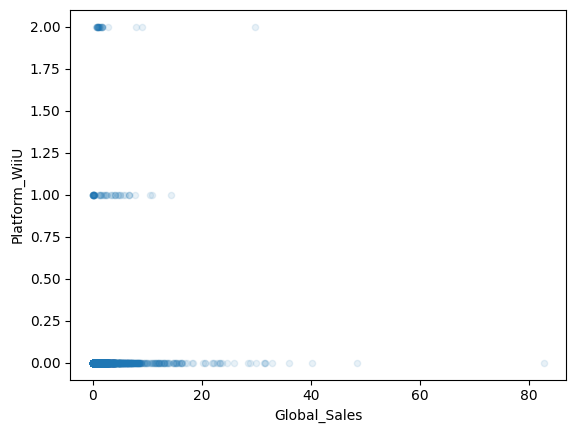

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline
df[df['Global_Sales']<4233].plot(kind='scatter', x='Global_Sales', y='Platform_WiiU', alpha=0.1);

**ANOVA**

In [ ]:
#relation entre le genre et les global_sales
import statsmodels.api 
result = statsmodels.formula.api.ols('Global_Sales ~ Genre', data=df).fit()
analysis = statsmodels.api.stats.anova_lm(result)
analysis
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle le genre n'influe pas sur Global_Sales.

,df,sum_sq,mean_sq,F,PR(>F)
Genre,18.0,915.439424,50.857746,4.140265,9.779791e-09
Residual,3441.0,42268.187236,12.283693,NaN,NaN


In [ ]:
#relation entre le publisher et les global_sales
import statsmodels.api 
result = statsmodels.formula.api.ols('Global_Sales ~ Publisher', data=df).fit()
analysis = statsmodels.api.stats.anova_lm(result)
analysis
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle Publisher n'influe pas sur Global_Sales.

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,222.0,5987.844448,26.972272,2.347289,2.158407e-23
Residual,3237.0,37195.782212,11.490819,NaN,NaN


In [ ]:
#relation entre le studio et les global_sales
import statsmodels.api 
result1 = statsmodels.formula.api.ols('Global_Sales ~ Studio', data=df).fit()
analysis1 = statsmodels.api.stats.anova_lm(result1)
analysis1
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle Studio n'influe pas sur Global_Sales.

,df,sum_sq,mean_sq,F,PR(>F)
Studio,1066.0,19040.504204,17.861636,1.770396,5.393263e-30
Residual,2393.0,24143.122456,10.089061,NaN,NaN


In [ ]:
#relation entre le critic_score et les global_sales
import statsmodels.api 
result2 = statsmodels.formula.api.ols('Global_Sales ~ Critic_Score', data=df).fit()
analysis2 = statsmodels.api.stats.anova_lm(result2)
analysis2
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle Critic_Score n'influe pas sur Global_Sales.

,df,sum_sq,mean_sq,F,PR(>F)
Critic_Score,1.0,2244.313169,2244.313169,189.56925,4.973120e-42
Residual,3458.0,40939.313491,11.839015,NaN,NaN


In [ ]:
#relation entre le genre et le critic_score
import statsmodels.api 
result2 = statsmodels.formula.api.ols('Critic_Score ~ Genre', data=df).fit()
analysis2 = statsmodels.api.stats.anova_lm(result2)
analysis2
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle Critic_Score n'influe pas sur pledged.

,df,sum_sq,mean_sq,F,PR(>F)
Genre,18.0,312.176129,17.343118,8.396971,1.616256e-22
Residual,3441.0,7107.047325,2.065402,NaN,NaN


In [ ]:
#relation entre le publisher et le critic_score
import statsmodels.api 
result2 = statsmodels.formula.api.ols('Critic_Score ~ Publisher', data=df).fit()
analysis2 = statsmodels.api.stats.anova_lm(result2)
analysis2
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle publisher n'influe pas sur critic_score.

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,222.0,1612.940850,7.265499,4.050513,2.077547e-69
Residual,3237.0,5806.282603,1.793723,NaN,NaN


In [ ]:
#relation entre le studio et le critic_score
df1=df[["Critic_Score","Studio"]]
df1= DataFrame.to_numpy
import statsmodels.api 
result2 = statsmodels.formula.api.ols('Critic_Score ~ Studio', data=df1).fit()
analysis2 = statsmodels.api.stats.anova_lm(result2)
analysis2
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle studio n'influe pas sur critic_score.

NameError: ignored